In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
# Load the dataset into a DataFrame
df = pd.read_csv('master.csv')

In [6]:
# Filter the DataFrame to include only rows where the country is USA
data = df[df['country'] == 'USA']
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [7]:
# Print unique values in the 'country' column
print(df['country'].unique())      

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [8]:
# Filter the DataFrame to include only rows where the country is USA or 'United States'
usa_data = df[df['country'].isin(['USA', 'United States'])]
usa_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [9]:
# Drop 'gdp_for_year ($)' and 'gdp_per_capita ($)' columns
columns_to_drop = [' gdp_for_year ($) ', ' gdp_per_capita ($)']
clean_data= usa_data.drop(columns=columns_to_drop, errors='ignore')
clean_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,19693,Generation X


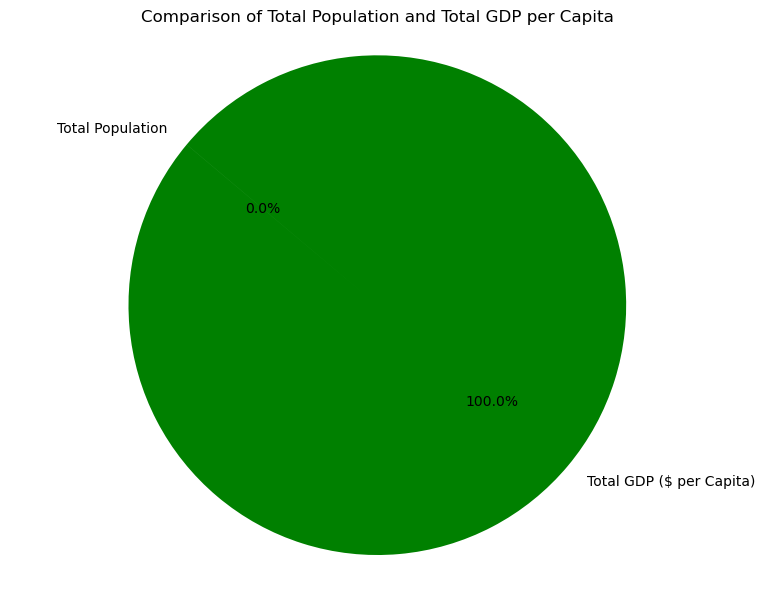

In [27]:
# Calculate the total population and total GDP
total_population = clean_data['population'].sum()
total_gdp = (clean_data['population'] * clean_data['gdp_per_capita ($)']).sum()

# Data to plot
labels = ['Total Population', 'Total GDP ($ per Capita)']
sizes = [total_population, total_gdp]
colors = ['blue', 'green']  # Choosing a different color for GDP

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Comparison of Total Population and Total GDP per Capita')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Show plot
plt.show()

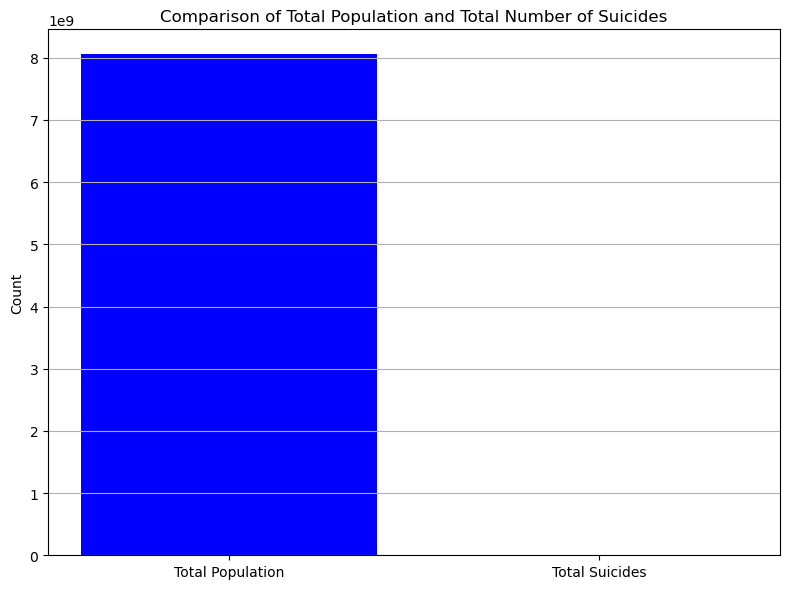

In [25]:
# Calculate the total population and total number of suicides
total_population = clean_data['population'].sum()
total_suicides = clean_data['suicides_no'].sum()

# Plotting
plt.figure(figsize=(8, 6))

# Create a bar plot
plt.bar(['Total Population', 'Total Suicides'], [total_population, total_suicides], color=['blue', 'red'])

plt.title('Comparison of Total Population and Total Number of Suicides')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()

# Show plot
plt.show()

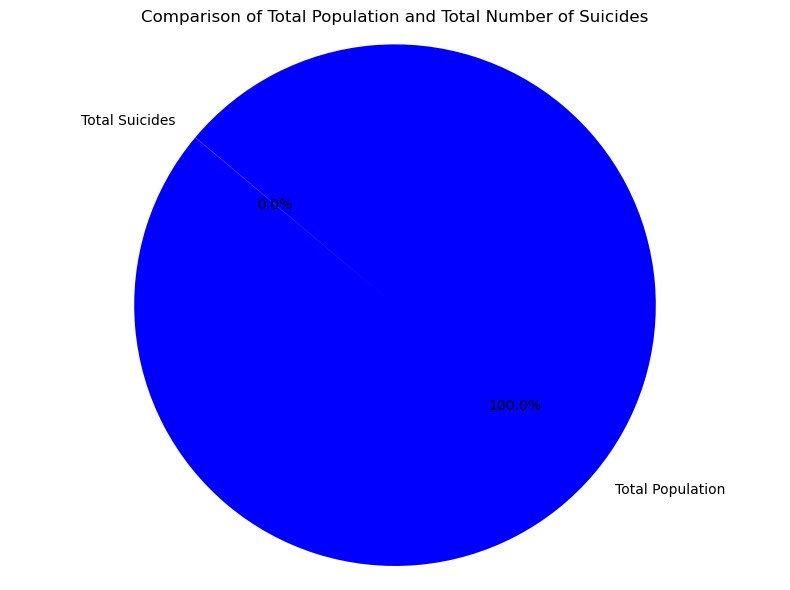

In [26]:
# Calculate the total population and total number of suicides
total_population = clean_data['population'].sum()
total_suicides = clean_data['suicides_no'].sum()

# Data to plot
labels = ['Total Population', 'Total Suicides']
sizes = [total_population, total_suicides]
colors = ['blue', 'red']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Comparison of Total Population and Total Number of Suicides')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Show plot
plt.show()

In [10]:
# Filter the DataFrame to include only rows where the country is USA or 'United States' and the sex is 'male'
usa_male_data = clean_data[(clean_data['country'].isin(['USA', 'United States'])) & (clean_data['sex'] == 'male')]
usa_male_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,19693,Generation X


In [12]:
# Grouping by generation and calculating mean suicide rate
male_grouped = usa_male_data.groupby('generation')['suicides_no'].mean()
male_grouped

generation
Boomers            8091.882353
G.I. Generation    3298.545455
Generation X       4629.545455
Generation Z        206.444444
Millenials         2349.166667
Silent             4448.682927
Name: suicides_no, dtype: float64

In [15]:
# Grouping by generation and calculating median number of suicides
male_grouped_median = usa_male_data.groupby('generation')['suicides_no'].median()
male_grouped_median

generation
Boomers            8495.0
G.I. Generation    2609.0
Generation X       4142.5
Generation Z        201.0
Millenials         3420.5
Silent             4603.0
Name: suicides_no, dtype: float64

In [13]:
# Filter the DataFrame to include only rows where the country is USA or 'United States' and the sex is 'female'
usa_female_data = clean_data[(clean_data['country'].isin(['USA', 'United States'])) & (clean_data['sex'] == 'female')]
usa_female_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,19693,Generation X


In [14]:
# Grouping by generation and calculating mean suicide rate
female_grouped = usa_female_data.groupby('generation')['suicides_no'].mean()
female_grouped

generation
Boomers            2339.352941
G.I. Generation     786.227273
Generation X       1136.454545
Generation Z        102.333333
Millenials          540.611111
Silent             1135.975610
Name: suicides_no, dtype: float64

In [16]:
# Grouping by generation and calculating median number of suicides
female_grouped_median = usa_female_data.groupby('generation')['suicides_no'].median()
female_grouped_median

generation
Boomers            2478.0
G.I. Generation     517.5
Generation X        854.0
Generation Z         87.0
Millenials          592.5
Silent             1146.0
Name: suicides_no, dtype: float64

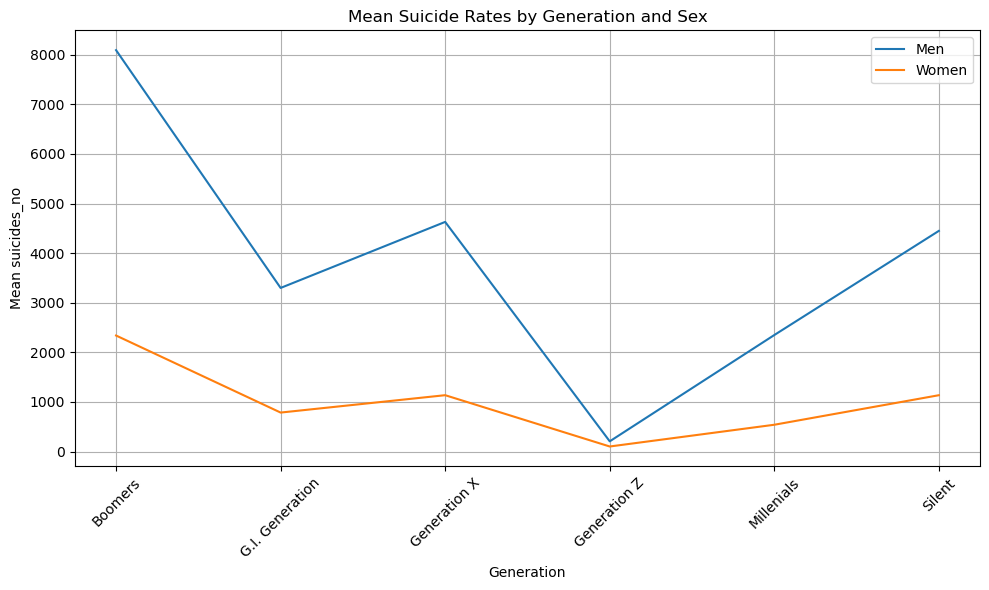

In [22]:
# Grouping data by sex
male_data = clean_data[clean_data['sex'] == 'male']
female_data = clean_data[clean_data['sex'] == 'female']

# Grouping by generation and calculating mean suicide number for men and women
male_grouped = male_data.groupby('generation')['suicides_no'].mean()
female_grouped = female_data.groupby('generation')['suicides_no'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(male_grouped.index, male_grouped.values, label='Men')
plt.plot(female_grouped.index, female_grouped.values, label='Women')

plt.title('Mean Suicide Rates by Generation and Sex')
plt.xlabel('Generation')
plt.ylabel('Mean suicides_no')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [30]:
drug_overdose = pd.read_csv("drugoverdose.csv")
drug_overdose

,race_ethnicity,year,overdose_death_rate,overdose_death_count,population_size,data_as_of,data_loaded_at
0,All races,2022,78.5,635,808437,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
1,"Asian/Pacific Islander, Non-Hispanic/Latinx",2022,10.5,35,332462,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
2,"Black/African American, Non-Hispanic/Latinx",2022,399.7,166,41531,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
3,Hispanic/Latinx,2022,96.8,124,128162,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
4,"White, Non-Hispanic/Latinx",2022,84.6,259,306282,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
5,All races,2021,76.4,623,815201,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
6,"Asian/Pacific Islander, Non-Hispanic/Latinx",2021,7.8,26,334298,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
7,"Black/African American, Non-Hispanic/Latinx",2021,430.4,179,41592,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
8,Hispanic/Latinx,2021,78.9,101,128030,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
9,"White, Non-Hispanic/Latinx",2021,83.5,260,311281,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM


In [31]:
# Drop the specified columns
cleaned_drug_data = drug_overdose.drop(columns=["data_as_of", "data_loaded_at"])
cleaned_drug_data

,race_ethnicity,year,overdose_death_rate,overdose_death_count,population_size
0,All races,2022,78.5,635,808437
1,"Asian/Pacific Islander, Non-Hispanic/Latinx",2022,10.5,35,332462
2,"Black/African American, Non-Hispanic/Latinx",2022,399.7,166,41531
3,Hispanic/Latinx,2022,96.8,124,128162
4,"White, Non-Hispanic/Latinx",2022,84.6,259,306282
5,All races,2021,76.4,623,815201
6,"Asian/Pacific Islander, Non-Hispanic/Latinx",2021,7.8,26,334298
7,"Black/African American, Non-Hispanic/Latinx",2021,430.4,179,41592
8,Hispanic/Latinx,2021,78.9,101,128030
9,"White, Non-Hispanic/Latinx",2021,83.5,260,311281


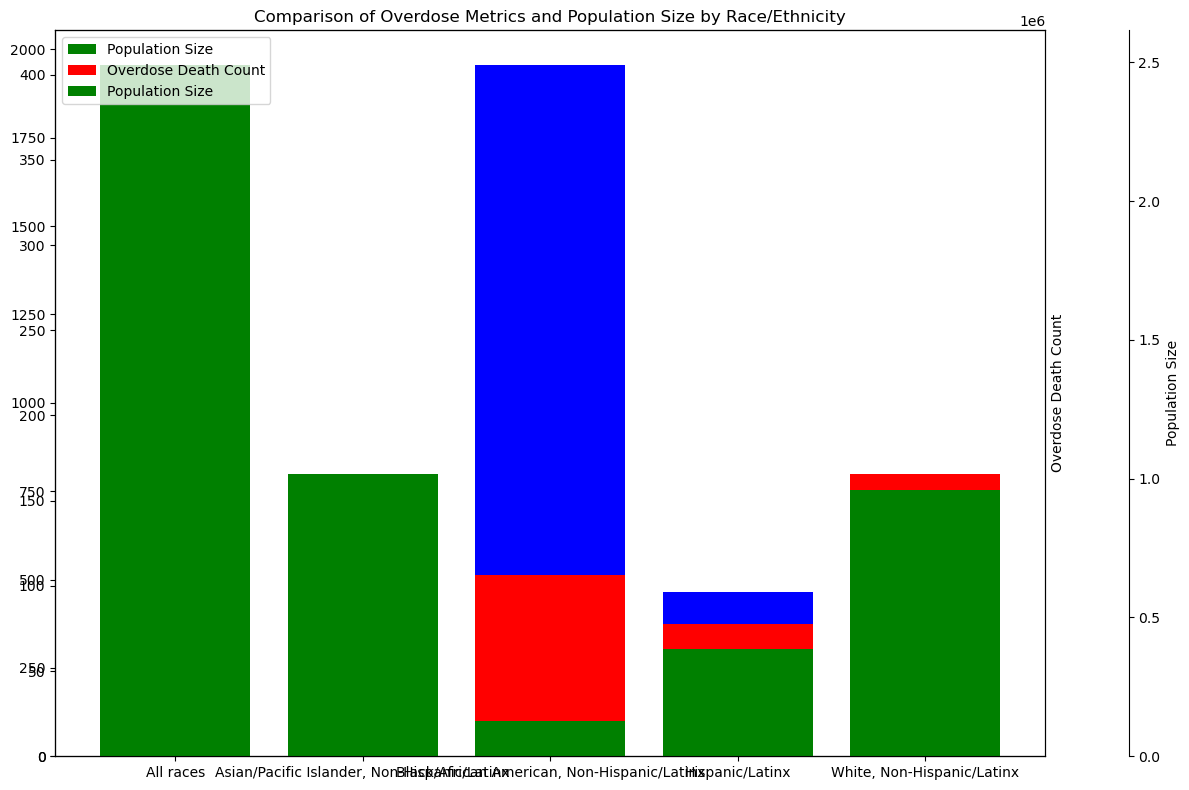

In [33]:
# Grouping data by race/ethnicity
grouped_race = cleaned_drug_data.groupby('race_ethnicity').agg({
    'overdose_death_rate': 'mean',
    'overdose_death_count': 'sum',
    'population_size': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plotting overdose death rate
plt.bar(grouped_race['race_ethnicity'], grouped_race['overdose_death_rate'], color='blue', label='Overdose Death Rate')

# Creating a secondary y-axis for overdose death count
ax2 = plt.gca().twinx()
ax2.bar(grouped_race['race_ethnicity'], grouped_race['overdose_death_count'], color='red', label='Overdose Death Count')

# Creating a tertiary y-axis for population size
ax3 = plt.gca().twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.bar(grouped_race['race_ethnicity'], grouped_race['population_size'], color='green', label='Population Size')

# Adjusting labels and legends
plt.title('Comparison of Overdose Metrics and Population Size by Race/Ethnicity')
plt.ylabel('Overdose Death Rate')
ax2.set_ylabel('Overdose Death Count')
ax3.set_ylabel('Population Size')

# Adding legends
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

plt.tight_layout()
plt.show()

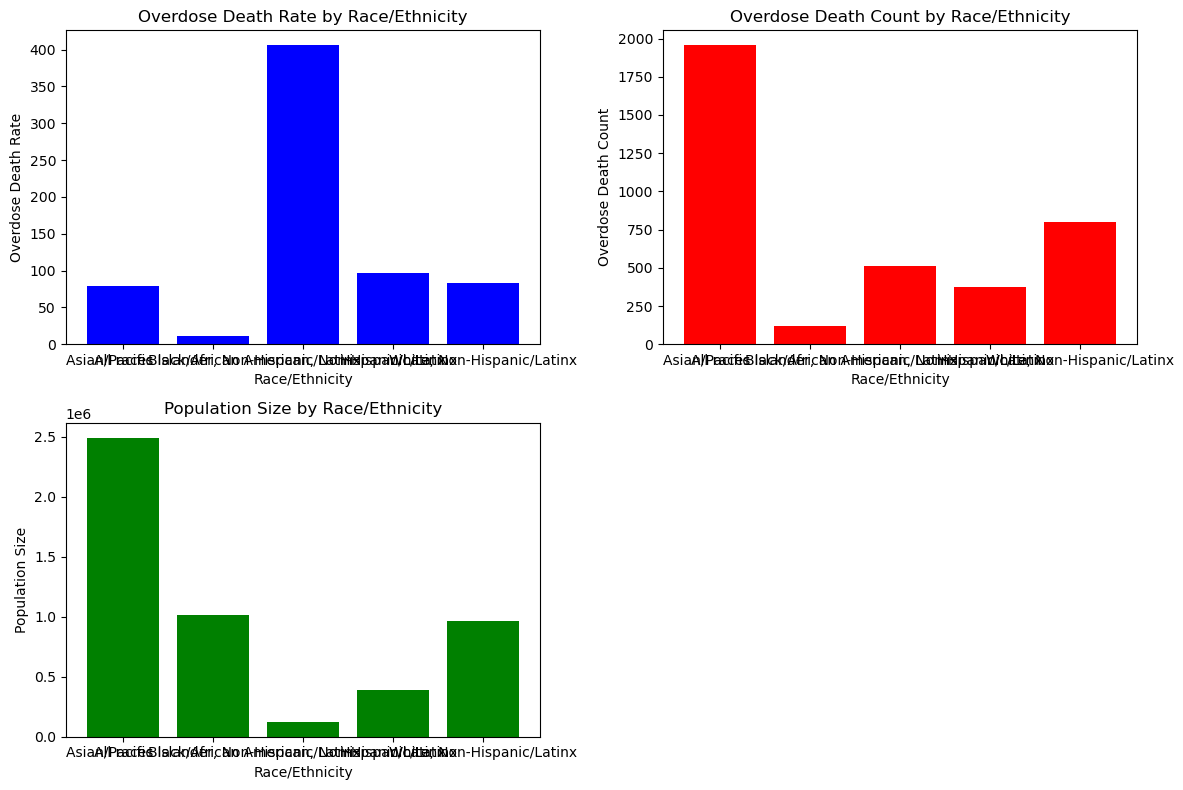

In [32]:
# comparing race/ethinicity to overdose rate, overdose death count and population size
# Grouping data by race/ethnicity
grouped_race = cleaned_drug_data.groupby('race_ethnicity').agg({
    'overdose_death_rate': 'mean',
    'overdose_death_count': 'sum',
    'population_size': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plotting overdose death rate
plt.subplot(2, 2, 1)
plt.bar(grouped_race['race_ethnicity'], grouped_race['overdose_death_rate'], color='blue')
plt.title('Overdose Death Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Overdose Death Rate')

# Plotting overdose death count
plt.subplot(2, 2, 2)
plt.bar(grouped_race['race_ethnicity'], grouped_race['overdose_death_count'], color='red')
plt.title('Overdose Death Count by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Overdose Death Count')

# Plotting population size
plt.subplot(2, 2, 3)
plt.bar(grouped_race['race_ethnicity'], grouped_race['population_size'], color='green')
plt.title('Population Size by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Population Size')

plt.tight_layout()
plt.show()

In [30]:
# Read the CSV file, skipping the first two rows and handling empty cells
convert_data = pd.read_csv("convertcsv.csv", skiprows=2, header=None, na_values=[""])

# Display the DataFrame
print(convert_data)

               0     1     2      3     4     5      6     7     8      9
0    Afghanistan   7.7   6.0  -1.8a   7.6   6.2  -1.7a   7.8   5.7  -2.1a
1        Albania   5.2   3.7   -2.0   7.6   5.3  -2.0a   2.9   2.2   -2.0
2        Algeria   4.7   2.6  -3.4a   5.9   3.3  -3.3a   3.5   1.9  -3.4a
3         Angola  17.6  12.6  -2.1a  30.0  21.7  -2.0a   6.2   4.7  -2.0a
4        Antigua   2.0   0.3      -   4.5   0.0      -   0.0   0.6      -
..           ...   ...   ...    ...   ...   ...    ...   ...   ...    ...
178    Venezuela   6.4   2.1  -6.2a  11.3   3.7  -6.2a   1.7   0.7  -5.6a
179     Viet Nam   7.2   7.2  +0.4a   9.4  10.6  +1.1a   5.2   4.2  -1.0a
180        Yemen   8.5   7.1  -1.1a  10.5   9.0  -1.0a   6.5   5.3  -1.3a
181       Zambia  24.0  14.4  -2.2a  35.9  25.7  -1.4a  14.5   5.3  -4.4a
182     Zimbabwe  20.0  23.6  +1.9a  28.2  37.8  +2.7a  14.2  13.5   +0.8

[183 rows x 10 columns]


In [31]:
# Manually define Row 1
row_1 = ["Country", "Both sexes", "", "", "Male", "", "", "Female", "", ""]

# Add Row 1 to the DataFrame
convert_data.loc[-1] = row_1
convert_data.index = convert_data.index + 1  # Shift the index
convert_data.sort_index(inplace=True)  # Sort the index

# Display the DataFrame
print(convert_data)

               0           1     2      3     4     5      6       7     8  \
0        Country  Both sexes               Male               Female         
1    Afghanistan         7.7   6.0  -1.8a   7.6   6.2  -1.7a     7.8   5.7   
2        Albania         5.2   3.7   -2.0   7.6   5.3  -2.0a     2.9   2.2   
3        Algeria         4.7   2.6  -3.4a   5.9   3.3  -3.3a     3.5   1.9   
4         Angola        17.6  12.6  -2.1a  30.0  21.7  -2.0a     6.2   4.7   
..           ...         ...   ...    ...   ...   ...    ...     ...   ...   
179    Venezuela         6.4   2.1  -6.2a  11.3   3.7  -6.2a     1.7   0.7   
180     Viet Nam         7.2   7.2  +0.4a   9.4  10.6  +1.1a     5.2   4.2   
181        Yemen         8.5   7.1  -1.1a  10.5   9.0  -1.0a     6.5   5.3   
182       Zambia        24.0  14.4  -2.2a  35.9  25.7  -1.4a    14.5   5.3   
183     Zimbabwe        20.0  23.6  +1.9a  28.2  37.8  +2.7a    14.2  13.5   

         9  
0           
1    -2.1a  
2     -2.0  
3    -3.4a 

In [32]:
# Manually define Row 1 and Row 2
row_1 = ["Country", "Both sexes", "", "", "Male", "", "", "Female", "", ""]
row_2 = [" ", "2000", "2019", "Trend2", "2000", "2019", "Trend2", "2000", "2019", "Trend2"]

# Add Row 1 and Row 2 to the DataFrame
convert_data.loc[-1] = row_1
convert_data.loc[-2] = row_2
convert_data.index = convert_data.index + 2  # Shift the index
convert_data.sort_index(inplace=True)  # Sort the index

# Display the DataFrame
print(convert_data)

               0           1     2       3     4     5       6       7     8  \
0                       2000  2019  Trend2  2000  2019  Trend2    2000  2019   
1        Country  Both sexes                Male                Female         
2        Country  Both sexes                Male                Female         
3    Afghanistan         7.7   6.0   -1.8a   7.6   6.2   -1.7a     7.8   5.7   
4        Albania         5.2   3.7    -2.0   7.6   5.3   -2.0a     2.9   2.2   
..           ...         ...   ...     ...   ...   ...     ...     ...   ...   
181    Venezuela         6.4   2.1   -6.2a  11.3   3.7   -6.2a     1.7   0.7   
182     Viet Nam         7.2   7.2   +0.4a   9.4  10.6   +1.1a     5.2   4.2   
183        Yemen         8.5   7.1   -1.1a  10.5   9.0   -1.0a     6.5   5.3   
184       Zambia        24.0  14.4   -2.2a  35.9  25.7   -1.4a    14.5   5.3   
185     Zimbabwe        20.0  23.6   +1.9a  28.2  37.8   +2.7a    14.2  13.5   

          9  
0    Trend2  
1          

In [33]:
# Manually define Row 1 and Row 2
row_1 = ["Country", "Both sexes", "", "", "Male", "", "", "Female", "", ""]
row_2 = [" ", "2000", "2019", "Trend2", "2000", "2019", "Trend2", "2000", "2019", "Trend2"]

# Add Row 1 and Row 2 to the DataFrame
convert_data.loc[-1] = row_1
convert_data.loc[-2] = row_2
convert_data.index = convert_data.index + 2  # Shift the index
convert_data.sort_index(inplace=True)  # Sort the index

# Format the DataFrame nicely
formatted_data = convert_data.to_string(index=False, header=None)

# Display the formatted DataFrame
print(formatted_data)

                               2000  2019 Trend2  2000   2019 Trend2   2000  2019 Trend2
                 Country Both sexes               Male               Female             
                               2000  2019 Trend2  2000   2019 Trend2   2000  2019 Trend2
                 Country Both sexes               Male               Female             
                 Country Both sexes               Male               Female             
             Afghanistan        7.7   6.0  -1.8a   7.6    6.2  -1.7a    7.8   5.7  -2.1a
                 Albania        5.2   3.7   -2.0   7.6    5.3  -2.0a    2.9   2.2   -2.0
                 Algeria        4.7   2.6  -3.4a   5.9    3.3  -3.3a    3.5   1.9  -3.4a
                  Angola       17.6  12.6  -2.1a  30.0   21.7  -2.0a    6.2   4.7  -2.0a
                 Antigua        2.0   0.3      -   4.5    0.0      -    0.0   0.6      -
               Argentina        9.2   8.1  -0.7a  16.0   13.5  -0.8a    3.4   3.3   -0.6
                 Arme

In [23]:
# Read only the first row of the CSV file
first_row = pd.read_csv("convertcsv.csv", nrows=1)

# Display the first row
print(first_row)

                           Countries1  Both sexes  Male  Female
2000 2019 Trend2 2000 2019     Trend2        2000  2019  Trend2


In [19]:
# https://stackoverflow.com/questions/18039057/pandas-parser-cparsererror-error-tokenizing-data 

Having a hard time converting this ###....https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9476842/table/T1/?report=objectonly